In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_path = '/content/Mall_Customers.csv'
df = pd.read_csv(data_path)

In [45]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.drop('CustomerID', axis=1, inplace = True)
df.head()

In [ ]:
df.shape

**Our dataset consists of 200 rows and 4 columns.**

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

**Let's look at the correlations.**

<ipython-input-56-4e392aef4187>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


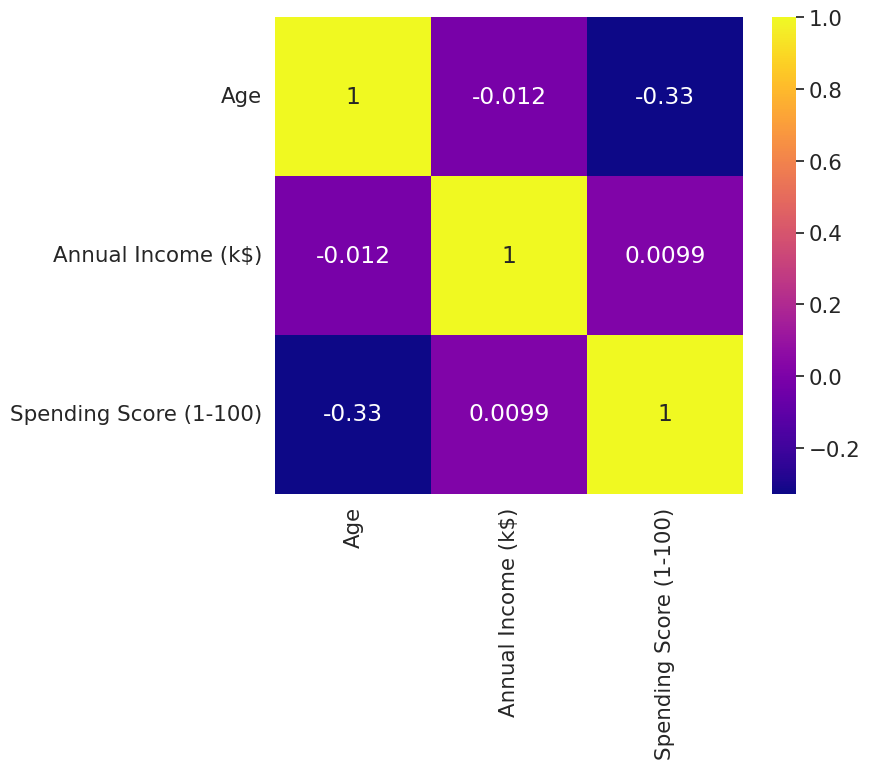

In [56]:
cor = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

**It is clear from this correlation table that older customers have less income and therefore spend less money.**

<ipython-input-57-49d678cd7bdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])
<ipython-input-57-49d678cd7bdf>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-57-49d678cd7bdf>:13: UserWarning: 

`distplot` is a deprecated function and wi

<Axes: title={'center': 'Annual Income'}, xlabel='Annual Income (k$)', ylabel='Density'>

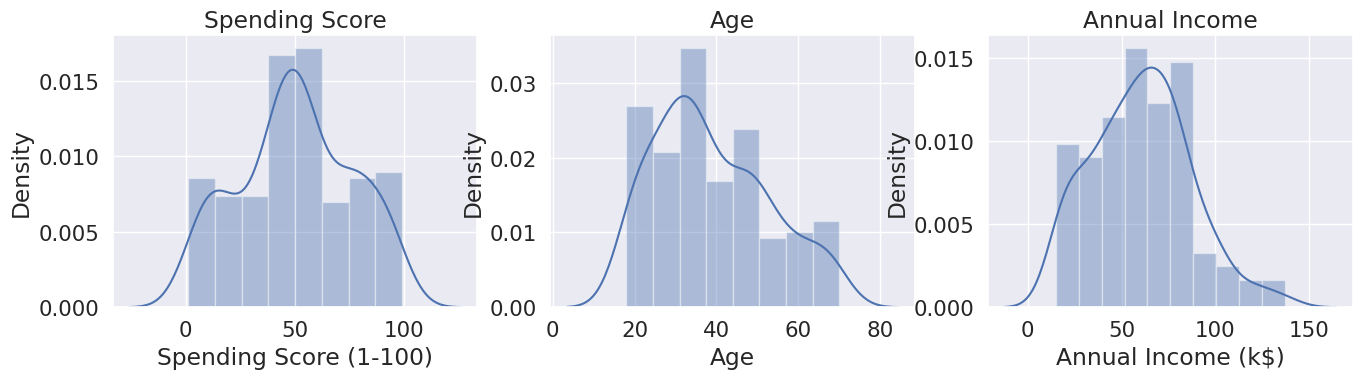

In [57]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
plt.title('Spending Score')
sns.distplot(df['Spending Score (1-100)'])

plt.subplot(3,3,2)
plt.title('Age', )
sns.distplot(df['Age'])

plt.subplot(3,3,3)
plt.title('Annual Income')
sns.distplot(df['Annual Income (k$)'])


**The distributions are generally similar to the normal distribution, with only a few standard deviations. The 'more normal' distribution among the distributions is the 'Spending Score'. That's good because it's our target column.**

In [58]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])



In [ ]:
df["Gender"].value_counts()

In [ ]:
df.head()

**As you can see, we converted the 'Gender' column to numeric using the 'Label Encoder'.**

**Male --> 1 , Female -->0**

In [59]:
spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Gender'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Gender'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]


print(f'Males Spending Score  : {spending_score_male}')
print(f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 0
Females Spending Score: 0


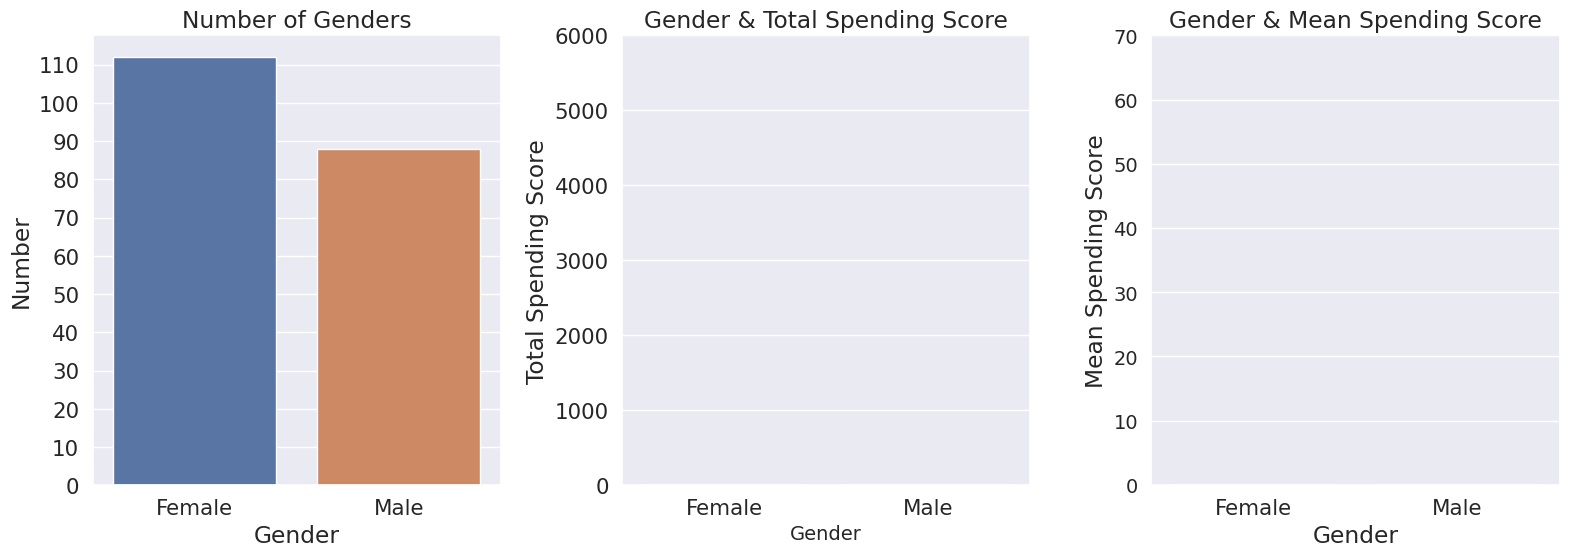

In [60]:

plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Gender'].value_counts(), data=df)


plt.xlabel("Gender")
plt.ylabel("Number")
plt.yticks(np.arange(0,116,10))
plt.title("Number of Genders")




list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])


plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score")
plt.yticks(np.arange(0,6001,1000))
plt.title("Gender & Total Spending Score")



list_genders_spending_score_mean = [int(spending_score_female/df['Gender'].value_counts()[0]),int(spending_score_male/df['Gender'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')



plt.xlabel("Gender")
plt.ylabel("Mean Spending Score")
plt.yticks(np.arange(0,71,10),size='14')
plt.title("Gender & Mean Spending Score")
plt.tight_layout()
plt.show()

**What do we understand from these 3 graphs?**

**There is no significant difference in the mean spending scores of males and females. Since the mean spending scores are very close to each other, the difference between the total spending scores is the difference between the number of male and female customers, but this difference is not serious. Considering all this, it would be meaningless to choose a gender-based target audience.**

# # Let's look at the relationship between Age and Spending score

Text(0.5, 1.0, 'Age - Spending Score')

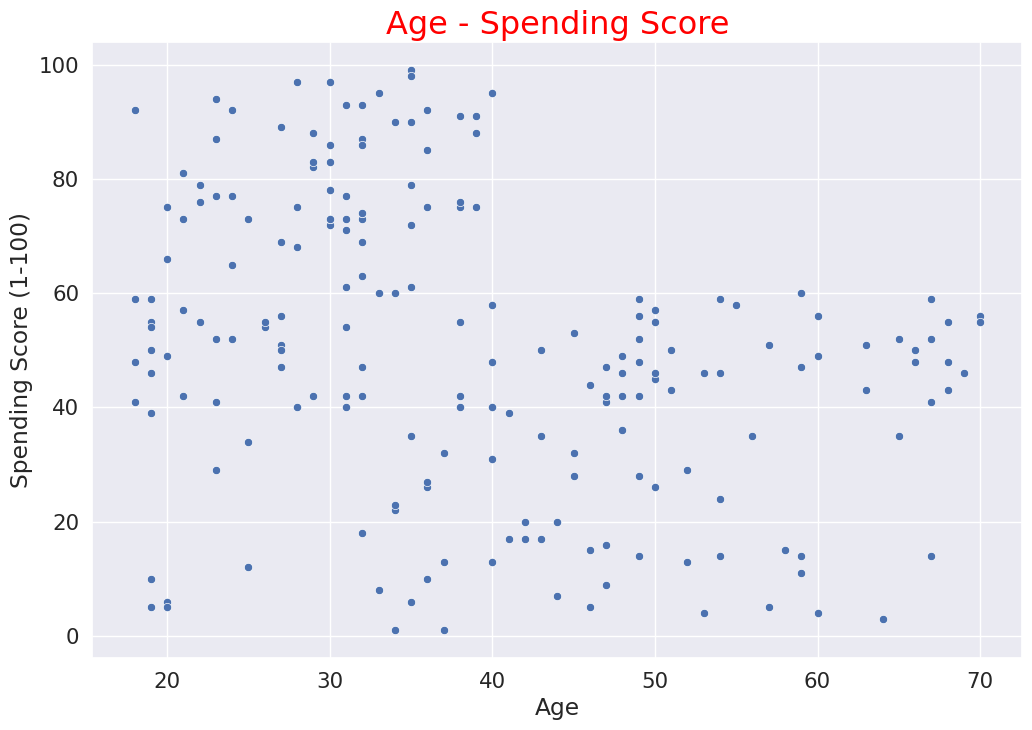

In [61]:


plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 23, color='red')


**People between the ages of 20-40 have made more purchases, considering the inference we just made about women, we can make our target audience more specific.**

# # Let's look at the relationship between Annual Income and Spending Score


<ipython-input-62-04027814bcf8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")


Text(0.5, 1.0, 'Annual Income - Spending Score')

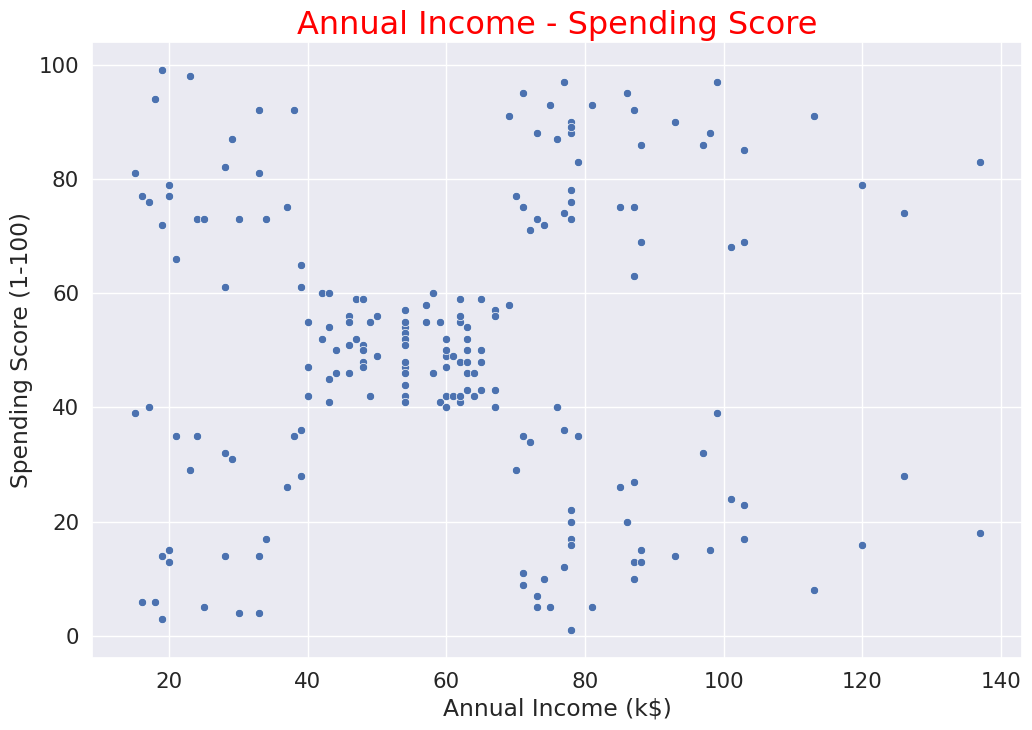

In [62]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')



**One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractive for them by choosing the target audience from the two regions above, we will see more profit can be made.**


**Choosing the number of clusters**

In [ ]:
df.head()

In [43]:
X = df.iloc[:,[2,3]].values

In [44]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [46]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)
  print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28]
[269981.28, 181363.59595959593]
[269981.28, 181363.59595959593, 106348.37306211122]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895]
[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]


In [47]:
print(len(wcss))

10


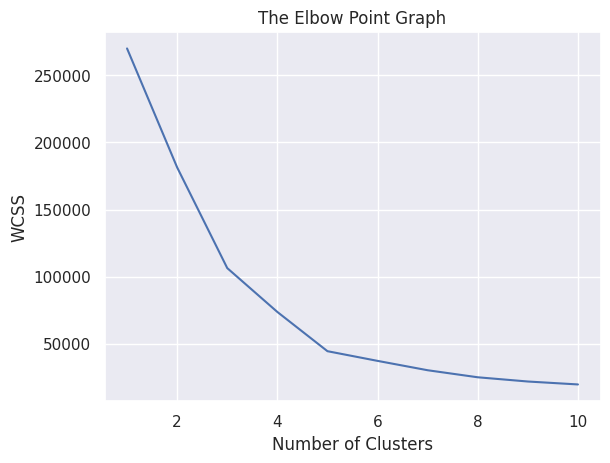

In [48]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [52]:
dummy = pd.DataFrame(Y)

In [53]:
dummy.head()

,0
0,4
1,3
2,4
3,3
4,4


In [54]:
dummy[0].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: 0, dtype: int64

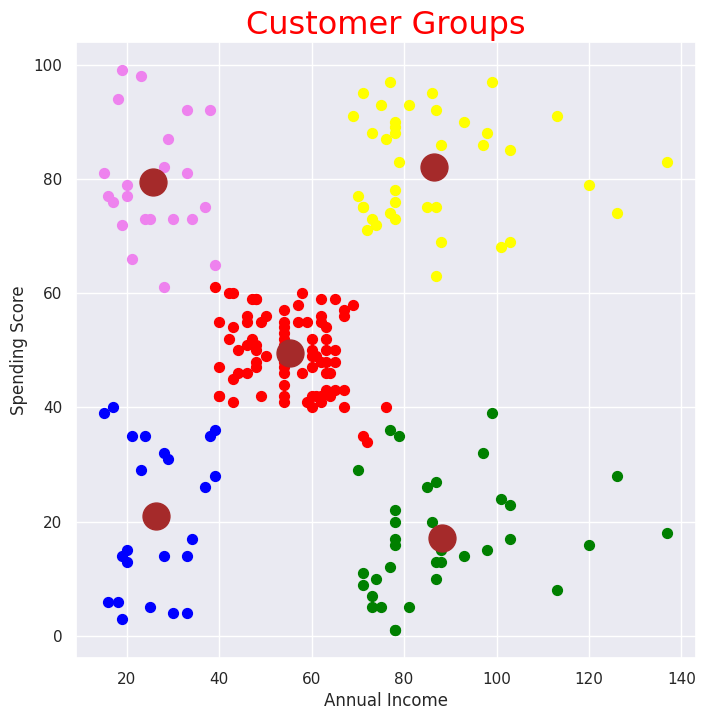

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  s = 375, c = 'brown', label = 'Centroids')

plt.title('Customer Groups', color='red',fontsize='23')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# PCA


In [ ]:
X = df
# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_2D = pca.fit_transform(X)
X_2D

In [ ]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'4' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.**

In [ ]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

In [ ]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()